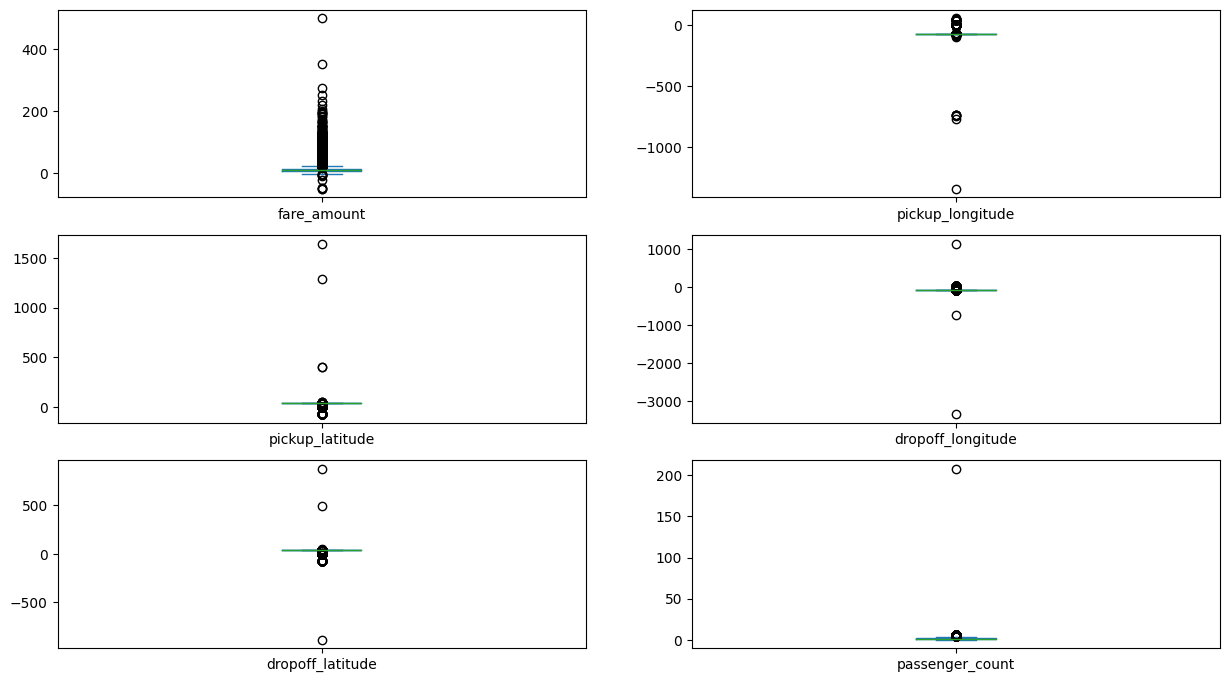

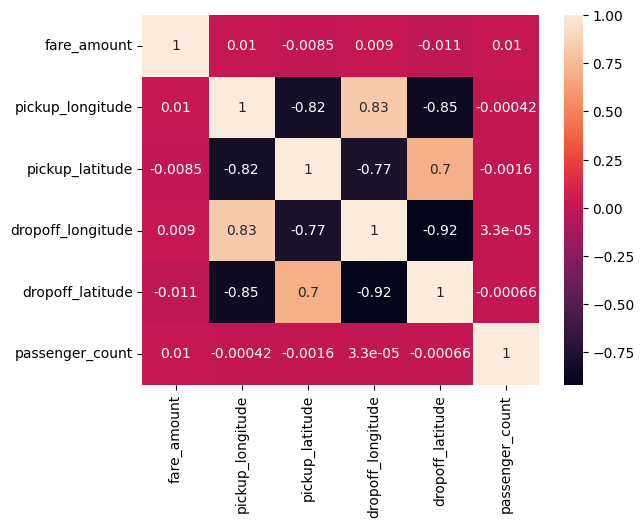

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


NameError: name 'r2_scpre' is not defined

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

df = pd.read_csv('uber.csv')
df = df.iloc[ : ,1:]
df = df.drop('key', axis=1)

df.isnull().sum()
df.dropna(inplace=True)

df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))
plt.show()

# df.plot(kind='bar')
df = df.drop('pickup_datetime', axis=1)
sns.heatmap(df.corr(), annot=True)
plt.show()

x = df.drop("fare_amount", axis = 1)
y = df["fare_amount"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

reg = LinearRegression()
reg.fit(x_train, y_train)
regPred = reg.predict(x_test)
regRMSE = np.sqrt(metrics.mean_squared_error(y_test, regPred))
regR2 = r2_score(y_test, regPred)

## Ridge Regression

ridge = Ridge()
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
ridge_RMSE = np.sqrt(metrics.mean_squared_error(y_test,pred))
ridge_squared = r2_score(y_test,pred)

lasso = Lasso()
lasso.fit(x_train, y_train)
lassoPred = lasso.predict(x_test)
lassoRMSE = np.sqrt(metrics.mean_squared_error(y_test, lassoPred))
lassoR2 = r2_scpre(y_test, lassoPred)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The RMSE tells how well a regression model can predict the value of a response variable in absolute terms while R- Squared tells how well the predictor variables can explain the variation in the response variable.

In [35]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [36]:
df.shape

(200000, 9)

In [37]:
df = df.iloc[:, 1:]

In [38]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [39]:
df = df.drop("key",axis=1)

In [40]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [43]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [42]:
df.dropna(inplace=True)
# df = df.dropna(subset=['dropoff_longitude','dropoff_latitude'])

In [10]:
def remove_outliers(df, col):
    if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lowerBound = Q1 - 1.5 * IQR
        upperBound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lowerBound, upperBound)
    return df

## passing all columns one by one to above function
def all_col(df, col_list):
    for col in col_list:
        df = remove_outliers(df, col)
    return df

In [44]:
# col_list = df.columns
# df = all_col(df,col_list)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


fare_amount             AxesSubplot(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         AxesSubplot(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        AxesSubplot(0.125,0.560732;0.352273x0.0939024)
passenger_count      AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
dtype: object

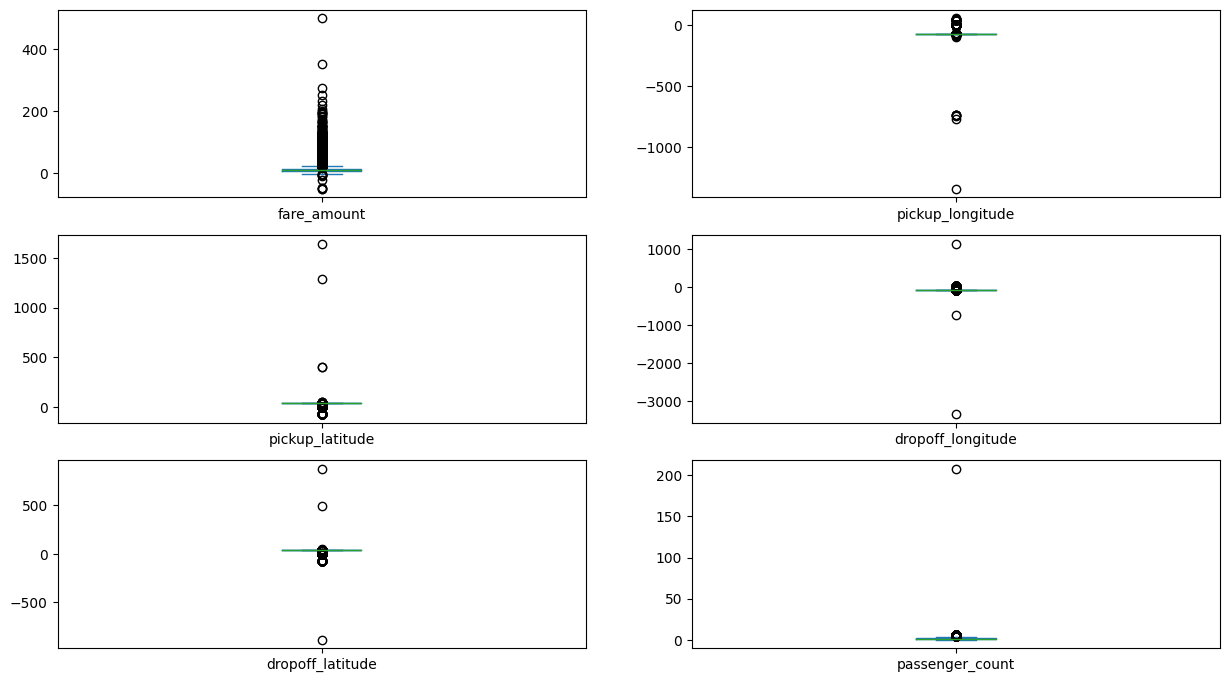

In [45]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

<AxesSubplot: >

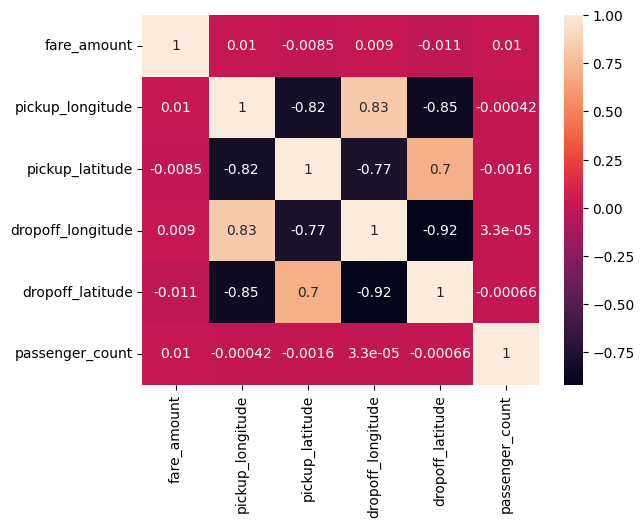

In [46]:
df = df.drop("pickup_datetime",axis=1)
sns.heatmap(df.corr(),annot=True)

In [47]:
x = df.drop("passenger_count",axis=1)
y = df["passenger_count"]

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [92]:
## Linear Regression
reg = LinearRegression()

reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
reg_squared = r2_score(y_test,y_pred)

In [106]:
## Ridge Regression

ridge = Ridge()

ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
ridge_RMSE = np.sqrt(metrics.mean_squared_error(y_test,pred))
ridge_squared = r2_score(y_test,pred)

In [107]:
## Lasso Regression

lasso = Lasso()

lasso.fit(x_train,y_train)
l_pred = lasso.predict(x_test)
lasso_RMSE = np.sqrt(metrics.mean_squared_error(y_test,l_pred))
lasso_squared = r2_score(y_test,l_pred)